In [0]:
import pandas as pd

In [0]:
def append_ext(fn):
    fn2=fn.split('.')[0]
    return fn2+".jpg"

In [10]:
traindf=pd.read_csv('species_numbers.csv',dtype=str)
#traindf2=pd.read_csv('species_numbers.csv',dtype=str)
#traindf3=pd.read_csv('species_numbers.csv',dtype=str)

traindf["ID"]=''
#traindf2["ID"]=''
#traindf3["ID"]=''
# file.split('.')[0]
# temp_name=traindf["training_sample"].split('.')[0]
traindf["ID"]=traindf["training_sample"].apply(append_ext)
#traindf2["ID"]=traindf["training_sample"].apply(append_ext2)
#traindf3["ID"]=traindf["training_sample"].apply(append_ext3)
#traindf = traindf.append(traindf2)
#traindf = traindf.append(traindf3)
traindf.columns

Index(['species', 'training_sample', 'ID'], dtype='object')

In [11]:
traindf

,species,training_sample,ID
0,1,train_aegithalos_caudatus.wav,train_aegithalos_caudatus.jpg
1,2,train_alauda_arvensis.wav,train_alauda_arvensis.jpg
2,3,train_anthus_trivialis.wav,train_anthus_trivialis.jpg
3,4,train_branta_canadensis.wav,train_branta_canadensis.jpg
4,5,train_carduelis_chloris.wav,train_carduelis_chloris.jpg
5,6,train_certhia_brachydactyla.wav,train_certhia_brachydactyla.jpg
6,7,train_columba_palumbus.wav,train_columba_palumbus.jpg
7,8,jtrain_corvus_corone.wav,jtrain_corvus_corone.jpg
8,9,train_cuculus_canorus.wav,train_cuculus_canorus.jpg
9,10,train_dendrocopos_major.wav,train_dendrocopos_major.jpg


In [0]:
from keras_preprocessing.image import ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [14]:
train_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=".",
    x_col="ID",
    y_col="species",
    subset="training",
    batch_size=15,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    # target_size=(8,8))
    target_size=(64,64))
    #target_size=(128,128))

Found 26 validated image filenames belonging to 34 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [16]:
valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=".",
    x_col="ID",
    y_col="species",
    subset="validation",
    batch_size=30,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 8 validated image filenames belonging to 34 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [17]:
import keras
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [20]:
model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same',
#                 input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))
model.add(Dense(34, activation='softmax'))
#model.compile(optimizers.Adam(lr=0.001, decay=2e-5),loss="categorical_crossentropy",metrics=["accuracy"])
# The SGD optimizer worked so poorly, val scores mostly just increased through the epochs.
#model.compile(optimizers.SGD(lr=0.1, decay=0),loss="categorical_crossentropy",metrics=["accuracy"])
model.compile(optimizers.RMSprop(lr=0.0003, decay=1e-5),loss="categorical_crossentropy",metrics=["accuracy"])
#original
#model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 64)       

Epoch 1/3
10/10 [==============================] - 6s 552ms/step - loss: 0.4611 - acc: 0.9550 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/3
10/10 [==============================] - 6s 556ms/step - loss: 0.8830 - acc: 0.9146 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/3
10/10 [==============================] - 5s 546ms/step - loss: 0.7347 - acc: 0.9393 - val_loss: 16.1181 - val_acc: 0.0000e+00


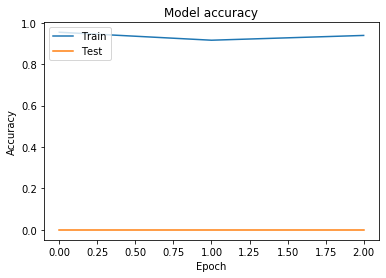

[16.11809539794922, 0.0]

In [22]:
#Fitting keras model, no test gen for now
#STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#print("Step size as calculated: ", STEP_SIZE_TRAIN)
STEP_SIZE_TRAIN=10
STEP_SIZE_VALID=10
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=3
)
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID
)